In [1]:
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import pickle

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_palette('bright')
cols = sns.color_palette('bright')

In [3]:
with open('../saved-experiments/resnet_width_logs.pkl', 'rb') as handle:
    plotting_dict = pickle.load(handle)

In [4]:
output_ordering = np.array(plotting_dict['logs_order'])
output_log = plotting_dict['logs']
hessian_eff_dim_list = plotting_dict['hessian_eff_dim']
xaxis = plotting_dict['xaxis']

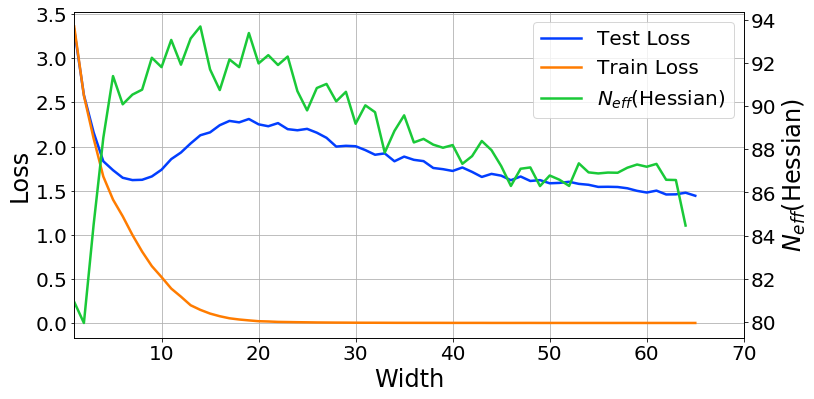

In [5]:
tick_size = 20
ax_fs = 24
leg_fs = 20
lw = 2.5

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),4], 
         label = 'Test Loss', color = cols[0], linewidth=lw)
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),2], 
         label = 'Train Loss', color=cols[1], linewidth=lw)


#ax.legend()


ax.set_xlabel('Width', fontsize=ax_fs)
ax.set_ylabel('Loss', fontsize=ax_fs)
ax.tick_params('both', labelsize=tick_size)

ax2 = ax.twinx()
ax2.plot(xaxis, hessian_eff_dim_list, label = r'$N_{eff}$(Hessian)',
        color=cols[2], linewidth=lw)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(loc='upper right',handles=lines + lines2, labels=labels + labels2, fontsize=leg_fs)
ax2.set_ylabel(r'$N_{eff}$(Hessian)', fontsize=ax_fs)
ax2.tick_params('y', labelsize=tick_size)
ax.set_xlim(1, 70)
ax.grid()
plt.savefig('./dnn_double_descent.pdf', bbox_inches='tight')